#### Firstly, finding K using Elbow Method

WCSS:  [77.5, 4.0, 2.5, 2.0, 0.5]


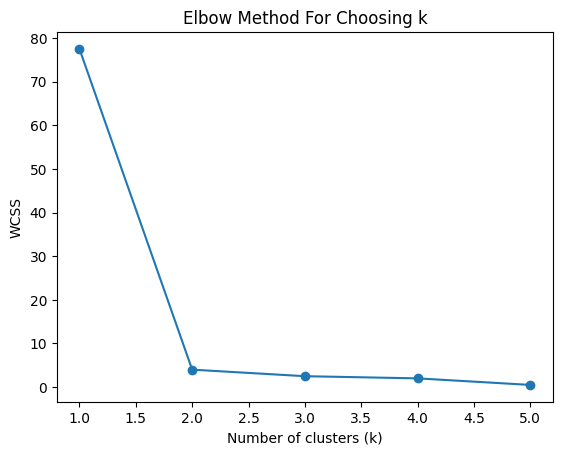

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1], [2], [3], [8], [9], [10]])
wcss = [] # Sum of Sqaured Errors

for k in range(1, 6):
    km = KMeans(n_clusters=k)
    km.fit(X)
    wcss.append(km.inertia_) 

print("WCSS: ", wcss)
plt.plot(range(1, 6), wcss, marker = 'o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Choosing k')
plt.show()

Here, it can be clearly seen that K = 2.

#### K-Means

In [ ]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(X)

print("Cluster centers (Centroids): ", kmeans.cluster_centers_)
print("Labels: ", kmeans.labels_)

Cluter centers (Centroids):  [[2.]
 [9.]]
Labels:  [0 0 0 1 1 1]


Inertia measures how well-packed or "compact" your clusters are. It is the sum of squared distances between each data point and the centroid of its assigned cluster.

Range: 0 to ∞

The Catch: Inertia always decreases as you increase the number of clusters (k). If you have as many clusters as you have data points (k=N), inertia will be 0, but the model is useless.

In [ ]:
# Inertia
inertia = kmeans.inertia_
print(inertia)

4.0


The Silhouette Score measures how well-separated the clusters are. It answers the question: "Is this data point actually similar to its own cluster, and different from the neighboring clusters?"


The Goal: We want a score close to +1.

Range: −1 to +1.

+1: The point is perfectly clustered (far from other clusters, close to its own).

0: The point is on the decision boundary (overlapping clusters).

-1: The point is assigned to the wrong cluster (it is closer to a neighboring cluster than its own).

In [10]:
# Quality of cluster separation
silScore = silhouette_score(X, kmeans.labels_)
print(silScore) # Value nearby to "1" is preferred

0.8065476190476191


In [13]:
# Cluster Sizes
clusterSizes = np.bincount(kmeans.labels_)
print(clusterSizes)

[3 3]
